In [6]:
! pip install tensorflow


  Using cached tensorflow-2.19.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached grpcio-1.73.1-cp311-cp311-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.10.0-py3-none-any.whl.metadata (6.0 kB)
  Using cached h5py-3.14.0-cp311-cp311-win_amd64.whl.metadata (2.7 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp311-cp311-win_amd64.whl.metadata (14 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
  Using cached optree-0.16.0-cp311-cp311-win_amd64.whl.metadat

In [5]:
# Libraries for file handling, image processing, and plotting
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Libraries for building and training the deep learning model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
def load_dataset(folder_path):
    print(f"📁 Loading from: {folder_path}")
    
    csv_path = os.path.join(folder_path, "_classes.csv")
    df = pd.read_csv(csv_path)
    df.columns = df.columns.str.strip()  # remove leading/trailing spaces

    IMG_SIZE = 128
    X, y = [], []

    for _, row in df.iterrows():
        filename = row['filename']
        label = [row['Glioma'], row['Meningioma'], row['Pituitary'], row['No Tumor']]

        # Search for image file in subfolders
        img_path = None
        for root, _, files in os.walk(folder_path):
            if filename in files:
                img_path = os.path.join(root, filename)
                break

        if img_path is None:
            print(f"❌ File not found: {filename}")
            continue

        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            img = img / 255.0
            X.append(img)
            y.append(label)
        except Exception as e:
            print(f"❌ Error loading {img_path}: {e}")

    X = np.array(X)
    y = np.array(y)
    print(f"✅ Loaded {len(X)} images. Shape: {X.shape}")
    return X, y


In [7]:
# Base path to your dataset
base_path = r"C:\Users\Madhusudan\Desktop\BRAIN TUMOUR\dataset"

# Load data
X_train, y_train = load_dataset(os.path.join(base_path, "train"))
X_val, y_val     = load_dataset(os.path.join(base_path, "valid"))
X_test, y_test   = load_dataset(os.path.join(base_path, "test"))


📁 Loading from: C:\Users\Madhusudan\Desktop\BRAIN TUMOUR\dataset\train
✅ Loaded 1695 images. Shape: (1695, 128, 128, 3)
📁 Loading from: C:\Users\Madhusudan\Desktop\BRAIN TUMOUR\dataset\valid
✅ Loaded 502 images. Shape: (502, 128, 128, 3)
📁 Loading from: C:\Users\Madhusudan\Desktop\BRAIN TUMOUR\dataset\test
✅ Loaded 246 images. Shape: (246, 128, 128, 3)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])


c:\Users\Madhusudan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    callbacks=[EarlyStopping(patience=3)]
)


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 17s 120ms/step - accuracy: 0.5871 - loss: 1.0171 - val_accuracy: 0.7570 - val_loss: 0.6093
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.8553 - loss: 0.4199 - val_accuracy: 0.8088 - val_loss: 0.5370
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.9164 - loss: 0.2695 - val_accuracy: 0.8367 - val_loss: 0.4738
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 0.9304 - loss: 0.2035 - val_accuracy: 0.8964 - val_loss: 0.4269
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.9730 - loss: 0.0812 - val_accuracy: 0.8865 - val_loss: 0.4009
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - accuracy: 0.9862 - loss: 0.0540 - val_accuracy: 0.8924 - val_loss: 0.4298
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 0.9913 - loss: 0.0373 - val_accuracy: 0.9163 - val_loss: 0.4475
Epoch 8/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.9989 - loss: 0.0143 - val_accuracy: 0

In [10]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    callbacks=[EarlyStopping(patience=3)]
)


Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 117ms/step - accuracy: 0.9692 - loss: 0.0833 - val_accuracy: 0.8924 - val_loss: 0.5099
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 108ms/step - accuracy: 0.9975 - loss: 0.0179 - val_accuracy: 0.9044 - val_loss: 0.5489
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 0.9243 - val_loss: 0.5759
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 114ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.9183 - val_loss: 0.5871


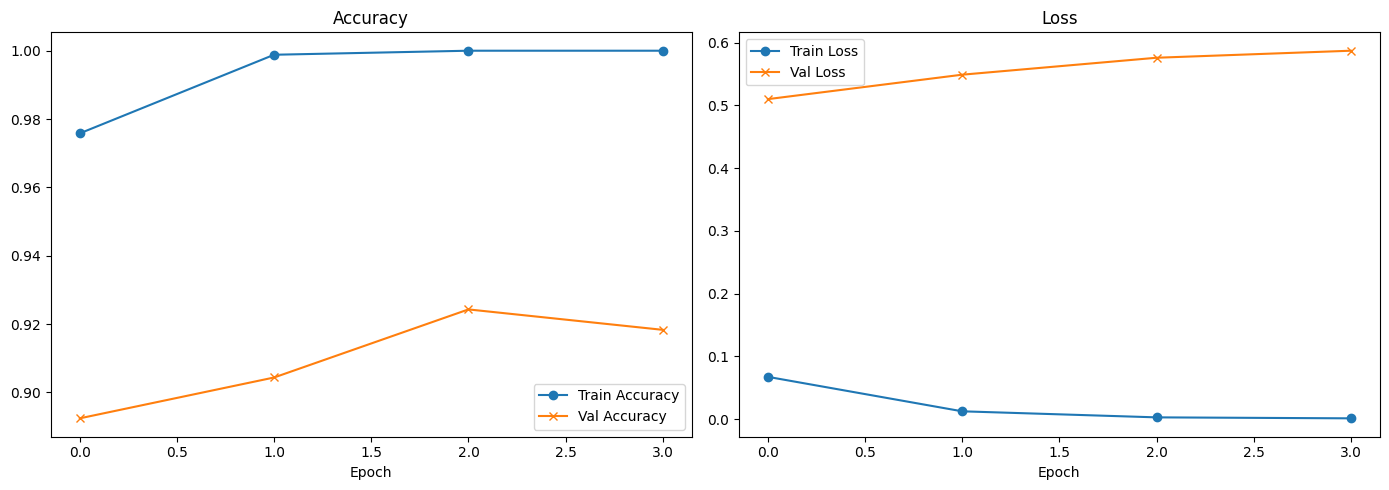

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(acc, label='Train Accuracy', marker='o')
plt.plot(val_acc, label='Val Accuracy', marker='x')
plt.legend(); plt.title('Accuracy'); plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Train Loss', marker='o')
plt.plot(val_loss, label='Val Loss', marker='x')
plt.legend(); plt.title('Loss'); plt.xlabel('Epoch')

plt.tight_layout()
plt.show()


In [17]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"🎯 Test Accuracy: {test_acc * 100:.2f}%")

# Save the trained model for Streamlit use
model.save("model.h5")
print("✅ model.h5 saved successfully.")


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.8862 - loss: 0.6075


🎯 Test Accuracy: 89.43%
✅ model.h5 saved successfully.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


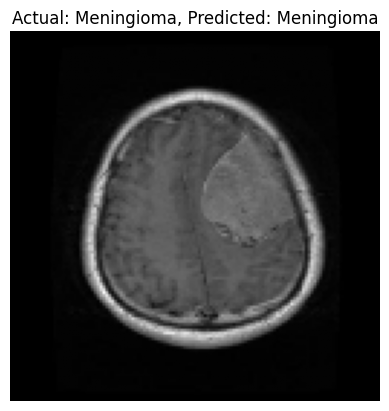

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


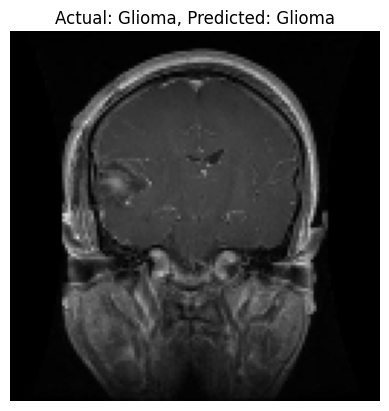

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


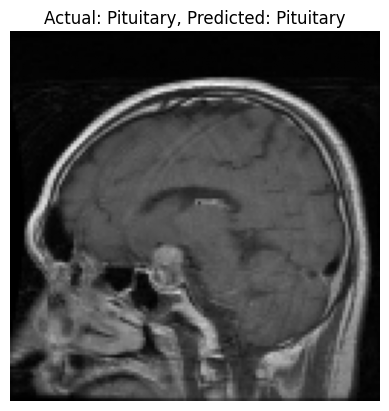

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


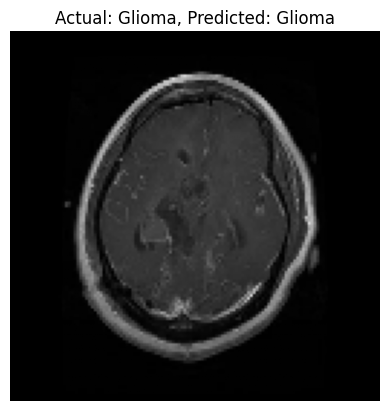

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


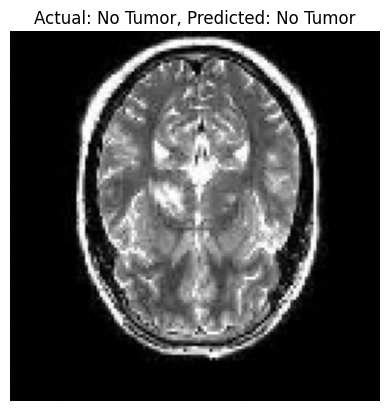

In [19]:
class_names = ['Glioma', 'Meningioma', 'Pituitary', 'No Tumor']

for i in range(5):
    img = X_test[i]
    label = np.argmax(y_test[i])
    pred  = np.argmax(model.predict(img.reshape(1, 128, 128, 3)))

    plt.imshow(img)
    plt.title(f"Actual: {class_names[label]}, Predicted: {class_names[pred]}")
    plt.axis('off')
    plt.show()
